<a href="https://colab.research.google.com/github/Indongspace/mulcamp34/blob/main/01_%ED%86%B5%EA%B3%84%EC%A0%81%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 통계 분석 방법

##1.중심 극한 정리

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Xbar~N(뮤,분산/n)

# 모집단 갯수 range(1,100000)
# 표본의 크기 100
# 시행 횟수 5000

print(np.mean(range(1,100000)))

# xbar 리스트
xbar_list = []
for i in range(5000):
  random_sample = random.sample(range(1,100000),700)
  xbar = np.mean(random_sample)
  xbar_list.append(xbar)

print(xbar_list)
np.mean(xbar_list)

50000.0
[48814.188571428575, 48749.08142857143, 49131.94285714286, 50363.55142857143, 51120.06428571429, 49129.374285714286, 49610.45285714286, 50188.625714285714, 47473.87, 49138.70714285714, 49880.54571428571, 49780.06857142857, 49820.65, 49936.14857142857, 50299.41142857143, 50544.76285714286, 50480.36714285714, 49602.78857142857, 50378.38285714286, 48513.19, 49347.92571428572, 51277.95142857143, 50452.09142857143, 51316.21428571428, 49978.43571428571, 48780.74857142857, 49424.114285714284, 49306.78571428572, 51370.04571428571, 50338.77, 50204.97571428571, 50109.07, 52903.00142857143, 49660.618571428575, 49468.75571428571, 49266.177142857145, 51330.22714285714, 51050.70857142857, 50909.03, 51258.025714285715, 50727.642857142855, 51476.73142857143, 52077.85428571429, 48478.11571428571, 49856.345714285715, 51355.04142857143, 49327.50571428571, 50321.76285714286, 48844.96857142857, 50967.01714285714, 50028.71, 51874.15714285714, 49981.46142857143, 50252.561428571425, 48069.92, 47898.48

49970.38655971429

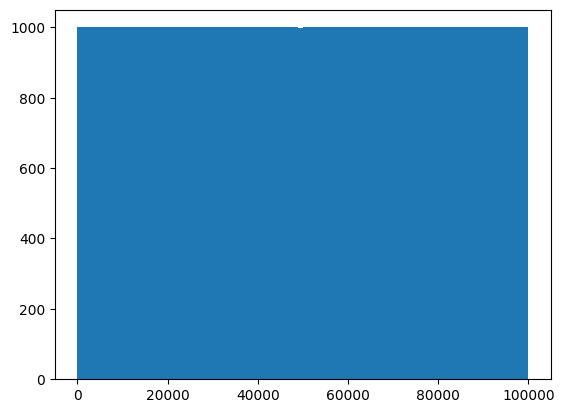

In [2]:
plt.hist(range(1,100000),bins=100)
plt.show()

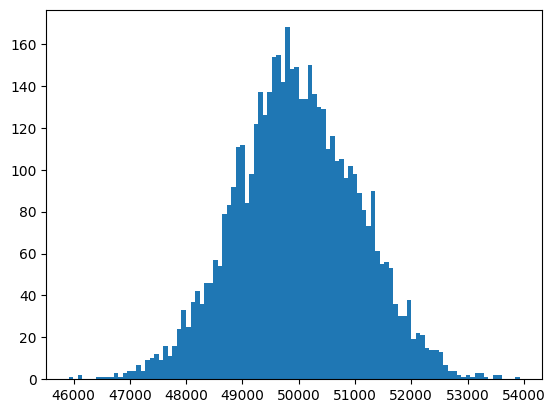

In [3]:
plt.hist(xbar_list,bins=100)
plt.show()

##2.t 검정
- 집단 간 평균 차이 검정


### 2-1 One Sample t-test(단일표본 t검정)
- 표본이 하나일 때, 모집단의 평균과 표본집단의 평균 사이에 차이가 있는지를 검증하는 방법
- scipy.stats 의 ttest_1samp(a, popman) 이용

In [4]:
# bus_wait_time.csv

import pandas as pd
from google.colab import drive

# Google 드라이브 마운트
drive.mount('/content/drive')

# 파일 경로 설정
file_path = '/content/drive/MyDrive/멀티캠퍼스34/proDS실습/dataset/'

# 데이터 불러오기
bus = pd.read_csv(file_path+'bus_wait_time.csv')

# 데이터 확인
bus.head()

Mounted at /content/drive


,waittime
0,14.685862
1,14.099321
2,15.074540
3,14.063753
4,15.004121


In [5]:
# 버스회사 주장 15min
# 승객의 주장 15min 아니다
# 1) 가설생성
# H0 : 뮤 = 15
# H1 : 뮤 != 15
# 2) 유의수준 (알파) 0.05
# 3) 검정통계량 산출 : 평균
# 4) pvalue와 유의수준알파 0.05와 비교해서 귀무가설의 기각여부를 결정

from scipy import stats

stats.ttest_1samp(bus, popmean=15)
#print(np.mean(bus.waittime))

# p-value > 0.05 : H0 채택, < 0.05 : 기각
# 검정 결과 판정
# 유의수준 0.05 하에 pvalue가 0.95로 유의수준보다 크므로 H0 채택
# 따라서 buswaittime은 15라고 할 수 있다.

result = stats.ttest_1samp(bus,popmean=15) # default가 양측검정
print(f"t통계량 : {result[0]}, pvalue : {result[1]}")

t통계량 : [0.05884138], pvalue : [0.95307857]


In [6]:
# 단측검정
# H0 : mu = 15
# H1 : mu > 15

result = stats.ttest_1samp(bus,popmean=15,alternative='greater')
print(f"t통계량 : {result[0]}, pvalue : {result[1]}")

t통계량 : [0.05884138], pvalue : [0.47653929]


### 2-2 Two Sample t-test(독립표본 t검정)
- 서로 다른 두 개의 그룹 간 평균 검정을 위한 방법
- scipy.stats 의 ttest_ind(x, y) 함수 이용


- '새로운 강의 방식이 학생들의 독해력 향상에 도움을 주는가?'
- 새로운 강의 방식에 의한 평균이 기존의 강의방식에 의한 평균보다 큰지 검정
- 16명의 학생들을 8명씩 랜덤 추출하여 두집단으로 나눔
- 한 집단에는 기존 방식(old), 한 집단에는 새로운 방식(new)

### H0 : u1 = u2 , H1: u1 > u2

In [7]:
import pandas as pd
reading = pd.read_csv(file_path+'Reading.csv')
reading

,ID,Group,Score
0,1,New,75
1,2,New,80
2,3,New,72
3,4,New,77
4,5,New,69
5,6,New,81
6,7,New,71
7,8,New,78
8,9,Old,65
9,10,Old,70


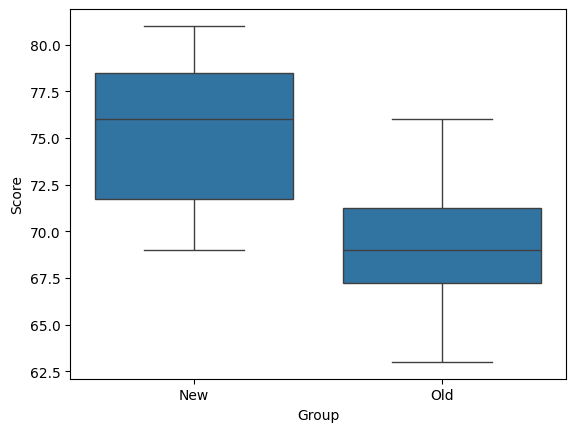

In [8]:
import seaborn as sns
sns.boxplot(x='Group',y='Score',data=reading)
plt.show()

In [9]:
# 그룹 나누기
new = reading[reading.Group=='New']
old = reading[reading.Group=='Old']

# 양측검정
# H0 : new 평균 = old 평균, d=0
# H1 : new 평균 != old 평균, d!=0

stats.ttest_ind(new.Score,old.Score,equal_var=False)

# 유의수준 0.05 하에 pvalue가 0.01 로 0.05 보다 작으므로 H0 기각
# 즉, old그룹과new그룹의 평균은 차이가 있다고 할 수 있다

TtestResult(statistic=2.9536127902039953, pvalue=0.010513377253950486, df=13.935945095796397)

### 2-3 Paired t-test(대응표본 t검정)
- 연관된 두 집단의 차이 에 대한 단일 표본의 평균 검정을 진행하는 방법
- scipy.stats 의 ttest_rel(x, y)
- 실험 단위를 동질적인 쌍으로 묶은 다음 각 쌍에 대해 랜덤하게 두 처리를 적용하고, 각 쌍에서 얻어진 반응 값의 차이를 이용하여 두 모평균 비교


대응표본 t- 검정사례
- '컴퓨터 교육 실시하기 전과 후의 성적 차이가 있는가?'
- 15명의 학생에게 통계학 시험 성적 전후 비교

In [10]:
paired = pd.read_csv(file_path+'Paired.csv')
paired

,ID,Pretest,Posttest
0,1,80,82
1,2,73,71
2,3,70,95
3,4,60,69
4,5,88,100
5,6,84,71
6,7,65,75
7,8,37,60
8,9,91,95
9,10,98,99


In [11]:
# 가설
# H0 : pretest = posttest, diff = 0
# H1 : pretest != posttest, diff != 0

stats.ttest_rel(paired.Pretest,paired.Posttest)

# 유의수준 0.05 하에 pvalue가 0.007로 0.05보다 작으므로 H0 기각
# 따라서 차이가 있다고 할 수 있다.

TtestResult(statistic=-3.093705670004429, pvalue=0.007930923229026533, df=14)

In [12]:
paired['diff'] = paired.Pretest - paired.Posttest
paired['diff'].describe()

count    15.000000
mean     -7.933333
std       9.931671
min     -25.000000
25%     -12.500000
50%      -7.000000
75%      -2.500000
max      13.000000
Name: diff, dtype: float64

## 3.카이제곱 독립성 검정
- 서로 연관성이 있는가? (독립적인가?)
- scipy.stats 의 chi2_contingency() 함수 이용


- 2차원 교차표(분할표) 작성 - Prefer 데이터

In [13]:
import pandas as pd

Prefer = pd.read_csv(file_path+'Prefer.csv')
Prefer.Agegroup.unique()

array(['30<', '30>='], dtype=object)

In [14]:
Prefer.Product.unique()

array(['B', 'A', 'C'], dtype=object)

In [15]:
# pd.crosstab()
prefer_table = pd.crosstab(index=Prefer.Agegroup,columns=Prefer.Product)
prefer_table

Product,A,B,C
Agegroup,,,
30<,20,20,60
30>=,70,100,30


In [16]:
# 가설 설정
# H0 : Agegroup과 Product는 관계가 없다, 서로 독립이다 (O = E)
# H1 : Agegroup과 Product는 관계가 있다, 서로 독립이 아니다 (O != E)

stats.chi2_contingency(prefer_table)

# 유의수준 0.05 하에 pvalue가 0으로 0.05보다 작으므로 귀무가설 기각
# 따라서 Agegroup과 상품구매는 관련이 있다.


Chi2ContingencyResult(statistic=65.0, pvalue=7.681204685202098e-15, dof=2, expected_freq=array([[30., 40., 30.],
       [60., 80., 60.]]))

##4.상관 분석

In [17]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

student=pd.read_csv(file_path+'Student.csv')
student

,ID,Age,Income,Expense
0,1,25,170,67
1,2,28,177,62
2,3,20,165,53
3,4,16,150,48
4,5,19,160,58
5,6,21,160,59
6,7,22,173,60
7,8,16,169,57
8,9,20,169,70
9,10,19,170,71


<Axes: >

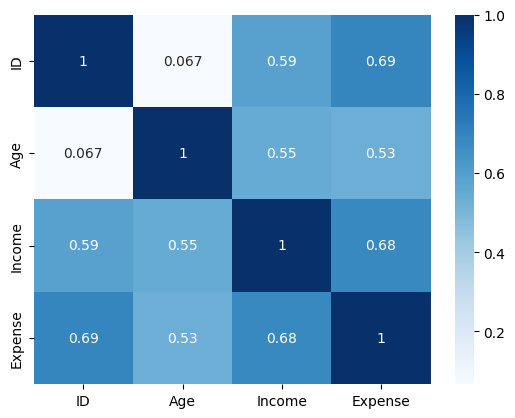

In [18]:
sns.heatmap(student.corr(),annot=True,cmap='Blues')

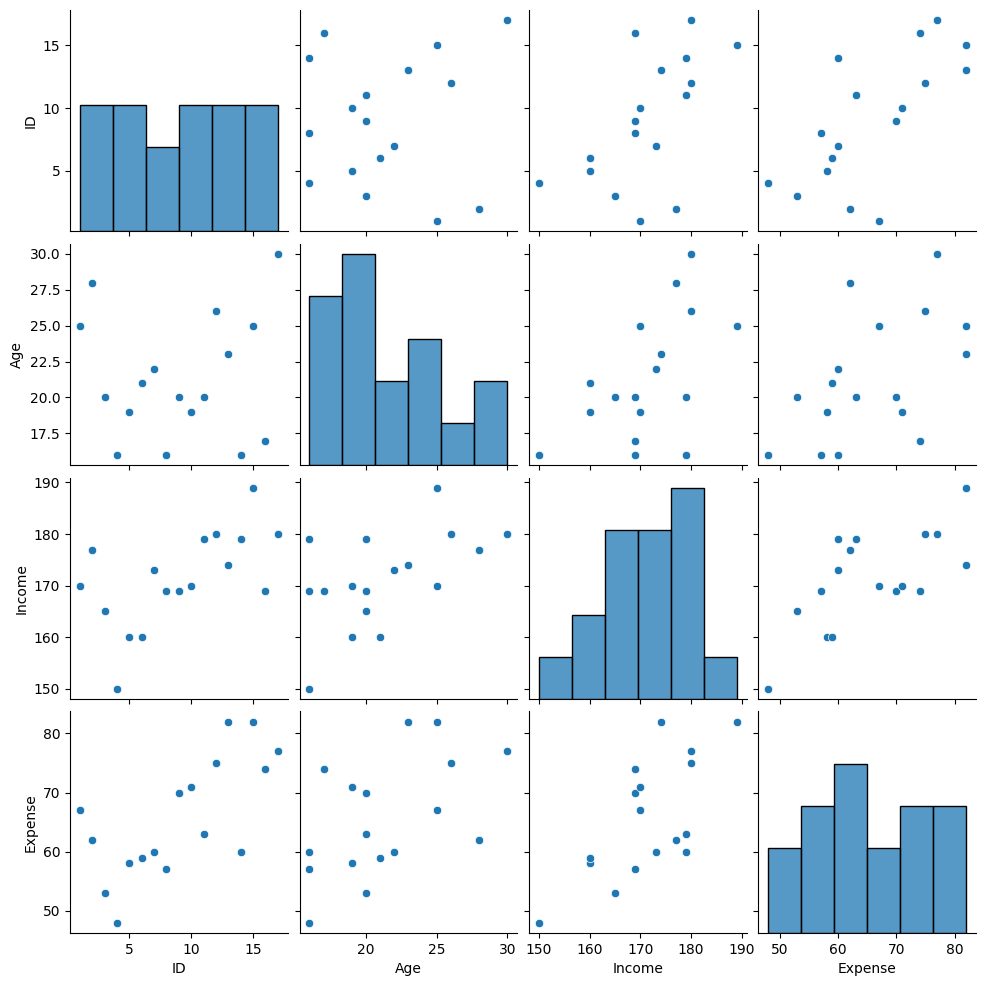

In [19]:
sns.pairplot(student)

In [21]:
# 상관계수 검정
# H0 : 상관계수 r = 0
# H1 : 상관계수 r != 0
from scipy import stats

stats.pearsonr(student.Income,student.Expense)
# 유의수준 0.05하에 pvalue가 0.002이므로 귀무가설 기각
# 즉, 상관계수는 유의하다

PearsonRResult(statistic=0.6812956535794541, pvalue=0.0026006496946941993)

In [22]:
stats.pearsonr(student.Age,student.Income)

PearsonRResult(statistic=0.5469681316248792, pvalue=0.023073167638070213)